*SIO221a Notes - Alford and Gille*

*Reading: Bendat and Piersol Ch. 4.2.2,5.2.2,8.5.4*

Concepts covered: Spectra

# Lecture 9

We've covered a lot of territory---we can Fourier transform with an fft,
we know some of the properties
of the Fourier transform, we've looked at Parseval's theorem. We've even defined the spectrum.  
Now we need to
stop beating around the bush and produce some spectra of our own.

In [1]:
%Let's load in some real data from Alford et al (2012) and have a look.
clear all
cd('/Users/malford/GoogleDrive/Work/Projects/Teaching/sio221a/MHA_2022/')
addpath('code')
load('data/Vel_2008-2009.mat')

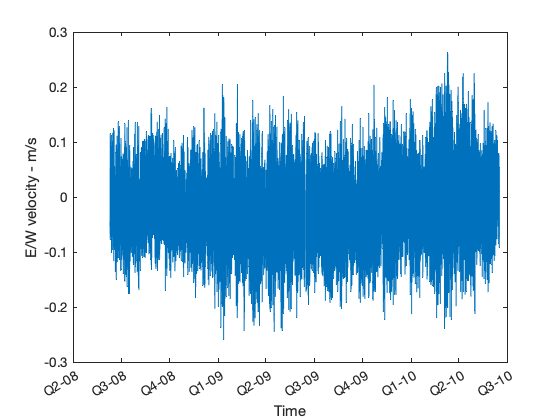

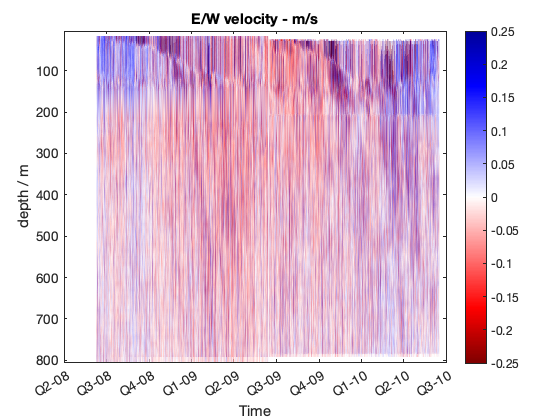

In [2]:
figure(1)
ezpc(Vel.dtnum,Vel.z,Vel.u);
caxis([-.25 .25]);colormap(redblue);colorbar
shg
title('E/W velocity - m/s')
datetick
xlabel('Time')
ylabel('depth / m')

figure(2)
iz=min(find(Vel.z > 300));
it=1:length(Vel.dtnum);

data=Vel.u(iz,it);
time=Vel.dtnum(it);

plot(time,data)
ylabel('E/W velocity - m/s')
xlabel('Time')


datetick

How do we take our data and produce a meaningful measure of the power
per unit frequency?  Here's a basic approach:

0th, we need to look at some basic things like our time series length, sample interval, etc.  Then, check it for those little annoying things data does, like have NaNs, gaps, etc.

In [3]:
dt=nanmean(diff(time));
disp(['Sample interval is ' num2str(dt*24*60) ' minutes.'])


disp(['record length is ' num2str(nanmax(time) - nanmin(time)) ' days long.'])
%% Check it for nans!
disp(['The record has ' num2str(length(find(isnan(data)))) ' NaNs.'])


Sample interval is 30.0001 minutes.
record length is 736.6069 days long.
The record has 44 NaNs.


In [4]:
%Aha! Found some Nans.  Let's just work on the first part of the record.
it=1:16000;
data=Vel.u(iz,it);
time=Vel.dtnum(it);
dt=nanmean(diff(time));
disp(['Sample interval is ' num2str(dt*24*60) ' minutes.'])

disp(['record length is ' num2str(nanmax(time) - nanmin(time)) ' days long.'])
%% Check it for nans!
disp(['The record has ' num2str(length(find(isnan(data)))) ' NaNs.'])




Sample interval is 30 minutes.
record length is 333.3125 days long.
The record has 0 NaNs.


The Fourier transform of a linear trend
puts energy into every possible frequency, meaning that if you
don't detrend your data, any residual trend will give you a red
spectrum.  You can spend a lot of energy interpreting red spectra
that result from linear trends, but they can really be viewed as
an artifact of the data.  Consider the linear trend in SST that we
examined earlier in class.  That linear trend produces a strongly
red spectrum.  To detrend in Matlab, you can least-squares fit, or simply
use Matlab's detrend function, which removes the mean at the same time:

In [6]:
%Next, detrend and remove the mean.
data=detrend(data);

Then, we know we're going to need to Fourier transform our
data, and plot the squared amplitudes.  We'll only need to analyze the
first $N/2+1$ of the Fourier coefficients, and we'll look at the amplitudes
of these values.  (The second half of
the Fourier coefficients are complex conjugates of the first half of
the record and correspond to negative frequencies.)   The frequencies
corresponding to the first $N/2+1$ coefficients will run from 0 cycles per
$N$ points to $N/2$ cycles per $N$ points.  So a first
step is to compute:

In [7]:
%
  a=fft(data);
  N=length(data);
  amp=abs(a(1:N/2+1)).^2; % for even N
%  amp=abs(a(1:(N+1)/2).^2; % for odd N


Let's talk for a moment about the frequencies.  This can be really confusing.  But we can always go back to our definition of the finite Fourier transform to get sorted out.  The highest frequency is the Nyquist frequency, and the picket fence of frequencies we are able to resolve is spaced by $1/T$ where $T$ is our overall time series length.  Don't forget that the first bin is the mean, but we generally skip that in spectral analysis since it's best practice to remove it anyway!

In [8]:
%% which freqs do these correspond to?
T=dt*N;

df=1/T;
fn=1/2/dt;

f=0:df:fn; %frequency vector, cpd, goes from 0 to Nyquist.


Now, let's normalize.  First, MATLAB's definition of the fft requires us to divide by N.  Next, since we're only taking half the record, we've thrown out
half the energy in the original data (except at frequency 0), so we'll need
to put that back in.

Finally, recall that the definition of the spectrum is the magnitude of the Fourier coefficients divided by the frequency spacing.

We can apply all three of these now.

In [9]:
amp = amp / N.^2; % first correct for the MATLAB normalization
amp = amp .* 2; %we threw out half of the spectrum; so correct for the lost variance.
amp = amp / df; % this is then the definition of the spectrum


Having gotten this far, we'd better check that Parseval's
theorem is working for us.  We'll need to see that the energy in the
initial record matches the energy in the Fourier transform. The beautiful thing about the spectrum is that once we have things in the right units, as we do now, the spectrum has units of *[measurement units]*$^2$ / *[frequency]* which in this case is $\mathrm{(m/s)^2/(cycles per day)}$.  Then, Parseval's theorem states that the variance in the time series $\sigma^2 = \int_0^\infty \Phi d\omega$ where $\Phi$ is the spectrum and $\omega$ is frequency.

A potential pitfall is whether to use cyclic or radian units.  We have chosen to use cyclic units here for frequency, so we'd better be consistent and use the same in our spectrum.  It enters in the frequency resolution $\delta\omega$ in the denominator, so as long as that's in cyclic units, we're all set.

Now checking Parseval goes like this:

In [10]:
%% Check parseval

variance=nanmean(data.^2)
sum_spec=sum(amp)*df
sum_spec / variance
%Check!  It gives the variance.



variance =

    0.0038


sum_spec =

    0.0038


ans =

    1.0000



Let's plot it now - our very first spectrum!

What do we see?

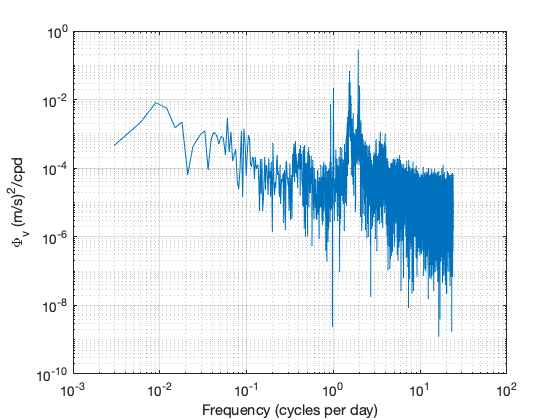

In [11]:
loglog(f,amp)
grid
ylabel('\Phi_v (m/s)^2/cpd')
xlabel('Frequency (cycles per day)')

Now, we can definitely see some interesting features already including some peaks at frequencies that might be becoming familiar to you all. Let's add some lines to guide our eyes.

In [1]:
loglog(f,amp)
grid
freqline(24/12.4);
freqline(1);
freqline(2*sind(50));
ylabel('\Phi_v (m/s)^2/cpd')
xlabel('Frequency (cycles per day)')

Error using eval
Unrecognized function or variable 'f'.



 But we have a problem in that our
results are way too noisy.  We'll have a hard time distinguishing
signal from peak.  So clearly we're going to need more realizations.
To do this, one common practice is chop our data into multiple segments.
As a first step, we can just cut the data into $M$ segments of $N/M$ points
each.  For example, here's a brute force approach:

In [12]:
 M=8; p=N/M;
    datab=reshape(data,N/M,M); % this gives us an array with N/M points
              % per column and M columns
    b=fft(datab);  % this computes the fft for each column
    amp_b=abs(b(1:p/2+1,:)).^2; 


In [13]:
%% Compute frequencies - note differences!


Tb=dt*p;

dfb=1/Tb;
fn=1/2/dt;

fb=0:dfb:fn; %frequency vector, cpd, goes from 0 to Nyquist.


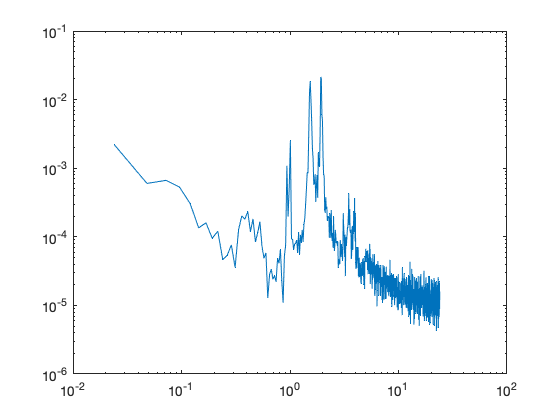

In [14]:
%% Normalize as above
amp_b = amp_b / p.^2; % first correct for the MATLAB normalization
amp_b = amp_b .* 2; %we threw out half of the spectrum; so correct for the lost variance.
amp_b = amp_b / dfb; % this is then the definition of the spectrum


loglog(fb,nanmean(amp_b,2));
shg


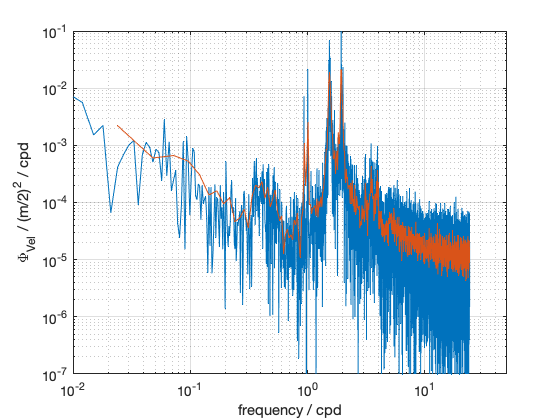

In [15]:
%% Now compare - and let's zoom in a bit
loglog(f,amp,fb,nanmean(amp_b,2));
ylim([1e-7 1e-1])
xlim([1e-2 50])
grid

%% label
ylabel('\Phi_{Vel} / (m/2)^2 / cpd')
xlabel('frequency / cpd')


In [16]:
%%Last: check variance.

variance=nanmean(data.^2);
sum_spec=nanmean(sum(amp_b)*dfb);
sum_spec / variance



ans =

    1.0033



Now the critical question.  How many degrees of freedom does this record have?
Is this $M$ to represent $M$ segments?  Maybe you can think of it that way,
but by convention, we get one degree of freedom for the real part and
one for the imaginary part, so 2 per segment.  We'll need this to
compute error bars, but let's start by noting that our error bars
are not the same as the standard error of the mean.  We're computing the
sum of $M$ squared quantities, and that's going to depend on something
that looks like a $\chi^2$ distribution.

When we compute spectra from segments,
clearly there are tradeoffs:  if I have $N$ data points total, I can have lots
of segments with few points in each segment, or few segments with more points
per segment.  The Nyquist frequency will be the same whatever I choose, since
that's determined by the interval between observations.  But the low-frequency
limit will differ, as will the increment between frequencies (which is determined
by the lowest resolved frequency).  There's no rule for how to handle this,
and your decisions will depend whether you want small uncertainties or
high resolution in frequency space.


We've come a long way in this lecture - we computed our first spectrum, learned how to break it into chunks in order to reduce the uncertainty, and began looking at how many degrees of freedom that afforded us.

Before we stop, let's revisit what we've done - and remind ourselves of the differences between real data and the infinite-domain abstraction of a Fourier transform.  This impacts our spectral estimates, as we learned, by reducing the frequency resolution to $\Delta f = T^{-1}$ where $T$ is the record length.  (Remember the Heisenberg uncertainty principle-like relation between time series length and frequency... essentially we can't separate low-frequency signals with only a portion of a wave cycle.)

But it also impacts our spectra in another way, by introducing something called leakage.  We'll talk about this more later, but for now consider that a finite-length time series from time 0 to $T$ can be thought of as the product of an infinite time series multipled by a "boxcar" or "tophat" function: $$H(t) = 0 (t < 0); 1 (0 < t < T); 0 (t > T).$$

And recall our useful property of the Fourier transform that the Fourier transform of a product is the convolution in frequency domain.  We'll show elsewhere that the Fourier transform of a top hat is a very important function known as the $sinc$ function: 

$$
sinc(x)=sin(x)/x
$$

So essentially, the effect of finite length time series is that our estimates of the Fourier coefficients are all convolved with the $sinc$ function, which for red spectra can cause some very confusing effects, allowing energy to "leak" to other frequencies.  Particularly for red or blue spectra, the leakage from high-energy portions of the spectrum can significantly contaminate the weaker parts of the spectrum.  For this reason, we often "window" our time series, or multiply it by a function that has better properties in frequency space than the $sinc$.  Typical choices are cosine windows or simply Gaussian windows - which we know from before have a nice Gaussian response in frequency, minimizing leakage (but at the cost of spectral resolution).  One never gets anything for free in time series analysis!